In [4]:
pip install pandas scikit-learn matplotlib seaborn scipy numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd 
import pickle
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os


ImportError: cannot import name '_c_internal_utils' from partially initialized module 'matplotlib' (most likely due to a circular import) (c:\Users\USER\Desktop\Cybersecurity-Threat-Assessment\env\Lib\site-packages\matplotlib\__init__.py)

In [ ]:
dataset = pd.read_csv('labeled_cves.csv')

In [ ]:
dataset.head()

,Name,Description,Threat_Type
0,CVE-1999-0001,ip_input.c in BSD-derived TCP/IP implementatio...,Denial of Service
1,CVE-1999-0002,Buffer overflow in NFS mountd gives root acces...,Buffer Overflow
2,CVE-1999-0003,Execute commands as root via buffer overflow i...,Buffer Overflow
3,CVE-1999-0004,"MIME buffer overflow in email clients, e.g. So...",Buffer Overflow
4,CVE-1999-0005,Arbitrary command execution via IMAP buffer ov...,Buffer Overflow


In [ ]:
dataset.describe()

,Name,Description,Threat_Type
count,326277,326277,326277
unique,326089,233742,11
top,CVE-2015-0849,** RESERVED ** This candidate has been reserve...,Other
freq,2,54410,205312


In [ ]:
missing_values = dataset.isnull().sum()
print("missing values: " , missing_values)

missing values:  Name           0
Description    0
Threat_Type    0
dtype: int64


In [ ]:
df = dataset[dataset['Threat_Type'].str.lower() != "other"]
filter_df = df.dropna(subset=["Description", "Threat_Type"])
print(df)
print(filter_df)

                  Name                                        Description  \
0        CVE-1999-0001  ip_input.c in BSD-derived TCP/IP implementatio...   
1        CVE-1999-0002  Buffer overflow in NFS mountd gives root acces...   
2        CVE-1999-0003  Execute commands as root via buffer overflow i...   
3        CVE-1999-0004  MIME buffer overflow in email clients, e.g. So...   
4        CVE-1999-0005  Arbitrary command execution via IMAP buffer ov...   
...                ...                                                ...   
326259   CVE-2025-6687  The Magic Buttons for Elementor plugin for Wor...   
326260  CVE-2025-52462  Cross-site scripting vulnerability exists in A...   
326262   CVE-2025-6463  The Forminator Forms – Contact Form, Payment F...   
326274  CVE-2025-24335  Nokia Single RAN baseband software versions ea...   
326275  CVE-2025-27021  The misconfiguration in the sudoers configurat...   

                  Threat_Type  
0           Denial of Service  
1          

In [ ]:
# Features and labels
X = filter_df["Description"]
y = filter_df["Threat_Type"]


In [ ]:
vectorizer = TfidfVectorizer(stop_words="english",
                            ngram_range=(1, 3),
                            max_features=5000)
X_vectorized = vectorizer.fit_transform(X)
print(X_vectorized)


  (np.int32(0), np.int32(4238))	0.3058900236172276
  (np.int32(0), np.int32(2480))	0.29643450667600135
  (np.int32(0), np.int32(512))	0.09901639931284449
  (np.int32(0), np.int32(3580))	0.09853725157768708
  (np.int32(0), np.int32(749))	0.10561717407026781
  (np.int32(0), np.int32(967))	0.1339517953767507
  (np.int32(0), np.int32(1462))	0.12652102275311172
  (np.int32(0), np.int32(3901))	0.12215125007328553
  (np.int32(0), np.int32(1332))	0.1881789252019512
  (np.int32(0), np.int32(2140))	0.33569511367838767
  (np.int32(0), np.int32(1302))	0.15148944480305118
  (np.int32(0), np.int32(3124))	0.28123399717376596
  (np.int32(0), np.int32(539))	0.12448940941766187
  (np.int32(0), np.int32(3588))	0.11895970165700524
  (np.int32(0), np.int32(752))	0.17130377973568228
  (np.int32(0), np.int32(972))	0.14265656082127015
  (np.int32(0), np.int32(1463))	0.12655625670260504
  (np.int32(0), np.int32(3918))	0.26612498963762976
  (np.int32(0), np.int32(1320))	0.38748702261627155
  (np.int32(0), np.in

In [ ]:
# train and test the data
x_train, x_test , Y_train, Y_test = train_test_split(X_vectorized , y,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
print(X_vectorized.shape) 
print(len(y))
# Grid Search with Random Forest
param_dist = {
    'n_estimators': randint(50,100),
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(class_weight="balanced", random_state=42)
random_search = RandomizedSearchCV(rf, 
                                param_distributions=param_dist,
                                n_iter=10,
                                cv=2,
                                n_jobs=-1,
                                verbose=2)

random_search.fit(x_train, Y_train)
#  best model Evaluation
model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

y_pred = model.predict(x_test)
print("Classification Report:")
print(classification_report(Y_test, y_pred))

(120965, 5000)
120965
Fitting 2 folds for each of 10 candidates, totalling 20 fits


 confusion_matrix.png


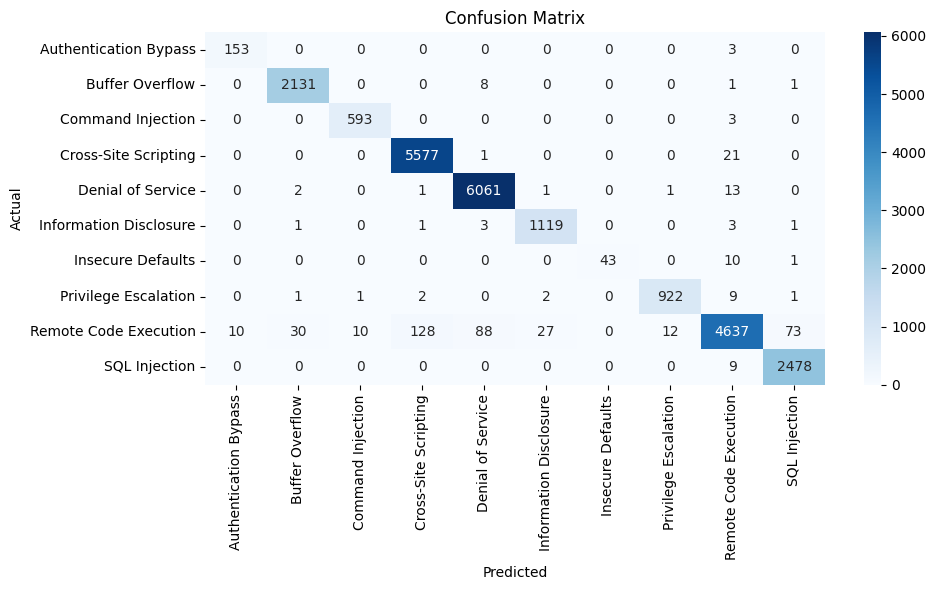

In [ ]:
try:
    cm = confusion_matrix(Y_test, y_pred, labels=model.classes_)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig("confusion_matrix.png")
    print(" confusion_matrix.png")
except Exception as e:
    print("confusion matrix could not be generated:", e)


In [ ]:
print("Saving in:", os.getcwd())

# Save model and vectorizer
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("model.pkl")
print("vectorizer.pkl")

Saving in: c:\Users\hp\Documents\GitHub\Cybersecurity-Threat-Assessment\ctad_model
model.pkl
vectorizer.pkl
